<a href="https://colab.research.google.com/github/Digx1/langgraph-notes/blob/main/module-2/multiple_schema_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [6]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

#Input Schema
class InputState(TypedDict):
    genre: str

#Internal Schema (
class InternalState(TypedDict):
    genre: str
    recommendations: list[str]
    scores: dict[str, float]

#Output Schema
class OutputState(TypedDict):
    top_movies: list[str]



In [7]:
# Node 1: Get movie recommendations based on genre
def get_recommendations(state: InputState) -> InternalState:
    print(" Fetching movie recommendations for:", state['genre'])

    #  database of movie
    movie_db = {
        "action": ["Mad Max: Fury Road", "John Wick", "Gladiator"],
        "romance": ["La La Land", "Pride & Prejudice", "Before Sunrise"],
        "sci-fi": ["Interstellar", "The Matrix", "Blade Runner 2049"]
    }

    return {
        "genre": state["genre"],
        "recommendations": movie_db.get(state["genre"], []),
        "scores": {}  # Scores will be filled in the next node
    }

In [8]:
# Node 2: Perform sentiment analysis (rate the movies)
def analyze_movies(state: InternalState) -> InternalState:
    print(" Analyzing movie ratings...")

    # Simulated sentiment analysis (higher rating for demonstration)
    scores = {movie: len(movie) % 5 + 7 for movie in state["recommendations"]}

    return {
        "genre": state["genre"],
        "recommendations": state["recommendations"],
        "scores": scores
    }


In [9]:
# Node 3: Filter top-rated movies and return only them
def get_top_movies(state: InternalState) -> OutputState:
    print(" Selecting top-rated movies...")

    # Select movies with score >= 8
    top_movies = [movie for movie, score in state["scores"].items() if score >= 8]

    return {"top_movies": top_movies}


In [10]:
# Build the Graph
graph_builder = StateGraph(InternalState)


In [11]:
# Add Nodes
graph_builder.add_node("get_recommendations", get_recommendations)
graph_builder.add_node("analyze_movies", analyze_movies)
graph_builder.add_node("get_top_movies", get_top_movies)


In [12]:
# Define Edges
graph_builder.add_edge(START, "get_recommendations")
graph_builder.add_edge("get_recommendations", "analyze_movies")
graph_builder.add_edge("analyze_movies", "get_top_movies")
graph_builder.add_edge("get_top_movies", END)

In [13]:
#Compile the Graph
graph = graph_builder.compile()

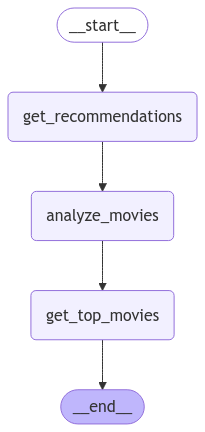

In [14]:
#Display
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
# Invoke the Graph
output = graph.invoke({"genre": "sci-fi"})
print(" Final Movie Recommendations:", output)

 Fetching movie recommendations for: sci-fi
 Analyzing movie ratings...
 Selecting top-rated movies...
 Final Movie Recommendations: {'genre': 'sci-fi', 'recommendations': ['Interstellar', 'The Matrix', 'Blade Runner 2049'], 'scores': {'Interstellar': 9, 'The Matrix': 7, 'Blade Runner 2049': 9}}
